## Introduction
1. This code implements linear regression and the notebook experiments with different values of regression coefficients and learning parameter. 
2. Key learning: the value of alpha (learning rate), if not chosen properly, can cause the cost to increase in every iteration. This is usually a sign of alpha being too high. So need to reduce the alpha. 
3. Implementation is quite fast, probably because most of the operations are matrix multiplication and complexity is linear with # of samples. 


In [1]:
import q3
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import time


## Run the training data regression and find out B and cost trajectory
Here are the parameters we use: 
1. Number of iterations = 16000
2. alpha = 0.0000001
3. B = vector with all 0s

These have been found to be optimal with experimentation

In [7]:
def plot_cost(costs):
    fig, ax = plt.subplots()
    ax.plot(costs)

    ax.set(xlabel='# iterations', ylabel='Cost value', title='How cost reduced iteratively')
    ax.grid()

    plt.show()

def plot_costs(costs1, label1, costs2, label2, costs3, label3):
    fig, ax = plt.subplots()
    ax.plot(costs1, color="green", label = label1)
    ax.plot(costs2, color="red", label = label2)
    ax.plot(costs3, color="blue", label = label3)
    
    ax.set(xlabel='# iterations', ylabel='MSE', title='How cost reduced iteratively')
    ax.grid()
    ax.legend(loc='upper center')

    plt.show()

MSE of training set (internal):  [1322.93224995]
MSE of validation set:  [1298.04320362]
B:  [0.050184949561954934, 0.0024022349503510874, 0.36150694606566647, 0.0067248265971194985, 1.9800085087655863, 0.0005905922989745783]
Final cost function:  1267369.0954532078


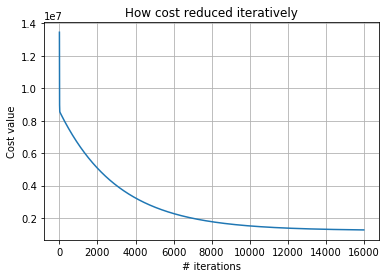

In [23]:
alpha = 0.0000001
iteration = 1000
B = [0, 0, 0, 0, 0, 0]

af = q3.Airfoil()
af.internal_train("Datasets/Question-3/airfoil.csv", B, alpha, iteration)
print("B: ", list(af.B.flatten()))  
print("Final cost function: ", af.costs[-1])
plot_cost(af.costs)

## Experiment with variable B, fixed alpha
We take the following with alpha = 0.0000001, iteration = 20000: 
1. B = [-1,0.01,3,1,5,1]
2. B = [0.01, -0.01, 0.02, -0.02, 0.03, -0.03]
3. B = [10,0,5,8,13,20]


### Observations
1. All of them converge around 15000 iterations and have similar trajectory. 
2. All of them are similar to the graph for B = 0. Which means B doesn't have big enough impact on the shape of the trajectory (unlike alpha)
3. B does have an impact on how quickly the loss starts converging, so if we need to have reduced number of iterations (for better speed), picking the right B will be crucial. 


MSE of training set (internal):  [1975.82763461]
MSE of validation set:  [1904.69608785]
MSE of training set (internal):  [1270.01704582]
MSE of validation set:  [1320.0655274]
MSE of training set (internal):  [1500.58566785]
MSE of validation set:  [1405.93278519]


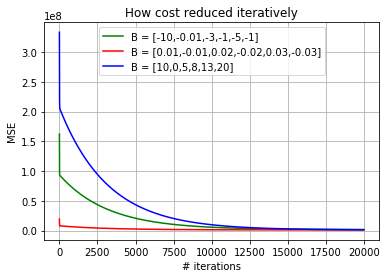

In [25]:
alpha = 0.0000001
iteration = 20000

B = [-10,-0.01,-3,-1,-5,-1]
af1 = q3.Airfoil()
af1.internal_train("Datasets/Question-3/airfoil.csv", B, alpha, iteration)

B = [0.01, -0.01, 0.02, -0.02, 0.03, -0.03]
af2 = q3.Airfoil()
af2.internal_train("Datasets/Question-3/airfoil.csv", B, alpha, iteration)

B = [10,0,5,8,13,20]
af3 = q3.Airfoil()
af3.internal_train("Datasets/Question-3/airfoil.csv", B, alpha, iteration)


plot_costs(af1.costs, "B = [-10,-0.01,-3,-1,-5,-1]",
           af2.costs, "B = [0.01,-0.01,0.02,-0.02,0.03,-0.03]", 
           af3.costs, "B = [10,0,5,8,13,20]")


## Experiment with fixed B, variable alpha
We take the following with B = [0, 0, 0, 0, 0, 0], , iteration = 100000:
1. alpha = 0.0000001
2. alpha = 0.00000001
3. alpha = 0.000000005
4. alpha = 0.000005 (will diverge)

### Observations
1. Quite sensitive to alpha (learning rate) - for #1, convergence is quickest, for others it is slow.
2. Number of iterations required to converge is much higher for lower alpha (obviously!), apparent from the graph
3. Not having right alpha can make this diverge quickly - #4 (bottommost graph), so choice has to be carefully made with experimentation


MSE of training set (internal):  [1242.75973647]
MSE of validation set:  [1272.11967985]
MSE of training set (internal):  [1588.16434188]
MSE of validation set:  [1608.70691115]
MSE of training set (internal):  [2913.95192448]
MSE of validation set:  [2620.14852065]


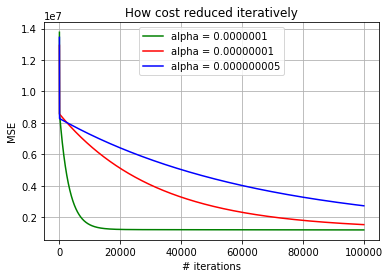

In [10]:
B = [0, 0, 0, 0, 0, 0]

alpha = 0.0000001
af1 = q3.Airfoil()
af1.internal_train("Datasets/Question-3/airfoil.csv", B, alpha)

alpha = 0.00000001
af2 = q3.Airfoil()
af2.internal_train("Datasets/Question-3/airfoil.csv", B, alpha)

alpha = 0.000000005
af3 = q3.Airfoil()
af3.internal_train("Datasets/Question-3/airfoil.csv", B, alpha)


plot_costs(af1.costs, "alpha = 0.0000001", af2.costs, "alpha = 0.00000001", af3.costs, "alpha = 0.000000005")


MSE of training set (internal):  [nan]
MSE of validation set:  [nan]


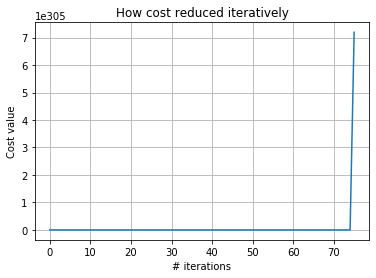

In [18]:
# With a diverging alpha
alpha = 0.000005
af = q3.Airfoil()
af.internal_train("Datasets/Question-3/airfoil.csv", B, alpha)
plot_cost(af.costs)

## Part 3 of the question
If you want to apply regression on some dataset but one of it's features has missing
values under below given conditions, how will you approach the problem. (No need
of Code Experimentation)
1. When 0-0.5% of values are missing of that feature
2. When 8-10% of values are missing of that feature
3. When 60-70% of values are missing of that feature

## Answer
1. If the missing values are 0-0.5% (very less), they can be replaced with a statistical measure (like mean or median) of the data. 
2. If it is 8-10%, one option is to try and estimate the data using some likeness measure (like kNN) to identify similar samples and use the value from that sample. We can also use linear regression algorithm itself to estimate these values. Mean or median of the feature can also be used but they might skew the data.  
3. If 60-70% values are missing, one option is to drop this feature from consideration since the data available may not be enough to impute the missing ones. If dropping this feature is not desirable or not an option, we can still use the current algorithm (linear regression), or other likeness measure and try to estimate. 

